# FLIGHT PRICE PREDICTION
Anyone who has booked a flight ticket knows how unexpectedly the prices vary. The cheapest 
available ticket on a given flight gets more and less expensive over time. This usually happens as 
an attempt to maximize revenue based on -                           
1. Time of purchase patterns (making sure last-minute purchases are expensive).                                                        
2. Keeping the flight as full as they want it (raising prices on a flight which is filling up in order to reduce sales and hold back inventory for those expensive last-minute expensive purchases).     

After collecting the data, you need to build a machine learning model. Before model building do all data pre-processing steps.Try different models with different hyper parameters and select the bestmodel.                                                        
Follow the complete life cycle of data science. Include all the steps like                                                         
1. Data Cleaning                                                  
2. Exploratory Data Analysis                                      
3. Data Pre-processing                                            
4. Model Building                                                 
5. Model Evaluation                                               
6. Selecting the best mode                                        

In [1]:
# Lets import all required libraries for the project
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import warnings
warnings.filterwarnings('ignore')

In [2]:
# importing data from csv file into jupyter notebook
df=pd.read_csv('Flightsdata.csv')
df

,Unnamed: 0,Airlines,Travel_date,From,To,Departuretime,Arrivaltime,Stops,Price
0,0,AirAsia,01/03/2022,NewDelhi,Mumbai,08:20,14:10,1stopviaRanchi,5953
1,1,AirAsia,01/03/2022,NewDelhi,Mumbai,08:20,14:10,1stopviaRanchi,5953
2,2,AirAsia,01/03/2022,NewDelhi,Mumbai,20:00,02:25,1stopviaGoa,5953
3,3,AirAsia,01/03/2022,NewDelhi,Mumbai,12:20,02:25,1stopviaGoa,5953
4,4,AirAsia,01/03/2022,NewDelhi,Mumbai,20:45,07:15,1stopviaBengaluru,5953
...,...,...,...,...,...,...,...,...,...
7990,34,IndiGo,31/05/2022,Ahmedabad,Goa,08:50,18:15,1stopviaMumbai,6003
7991,35,GoFirst,31/05/2022,Ahmedabad,Goa,09:10,16:55,1stopviaBengaluru,7290
7992,36,Vistara,31/05/2022,Ahmedabad,Goa,08:25,13:50,1stopviaNewDelhi,7313
7993,37,GoFirst,31/05/2022,Ahmedabad,Goa,22:20,13:20,1stopviaNewDelhi,7493


In [3]:
# scraping top 10 rows present in the dataset
df.head(10)

,Unnamed: 0,Airlines,Travel_date,From,To,Departuretime,Arrivaltime,Stops,Price
0,0,AirAsia,01/03/2022,NewDelhi,Mumbai,08:20,14:10,1stopviaRanchi,5953
1,1,AirAsia,01/03/2022,NewDelhi,Mumbai,08:20,14:10,1stopviaRanchi,5953
2,2,AirAsia,01/03/2022,NewDelhi,Mumbai,20:00,02:25,1stopviaGoa,5953
3,3,AirAsia,01/03/2022,NewDelhi,Mumbai,12:20,02:25,1stopviaGoa,5953
4,4,AirAsia,01/03/2022,NewDelhi,Mumbai,20:45,07:15,1stopviaBengaluru,5953
5,5,AirAsia,01/03/2022,NewDelhi,Mumbai,22:10,12:25,1stopviaJaipur,5953
6,6,GoFirst,01/03/2022,NewDelhi,Mumbai,06:05,14:05,1stopviaPatna,5954
7,7,GoFirst,01/03/2022,NewDelhi,Mumbai,09:00,15:45,1stopviaLucknow,5954
8,8,GoFirst,01/03/2022,NewDelhi,Mumbai,06:00,15:45,1stopviaLucknow,5954
9,9,GoFirst,01/03/2022,NewDelhi,Mumbai,09:10,17:50,1stopviaVaranasi,5954


In [4]:
# Scraping data of last 10 rows present in the dataset
df.tail(10)

,Unnamed: 0,Airlines,Travel_date,From,To,Departuretime,Arrivaltime,Stops,Price
7985,29,"IndiGo,AirIndia",31/05/2022,Ahmedabad,Goa,08:50,14:45,1stopviaMumbai,5534
7986,30,IndiGo,31/05/2022,Ahmedabad,Goa,04:30,12:40,1stopviaMumbai,5665
7987,31,IndiGo,31/05/2022,Ahmedabad,Goa,06:45,12:40,1stopviaMumbai,6003
7988,32,IndiGo,31/05/2022,Ahmedabad,Goa,08:50,15:25,1stopviaMumbai,6003
7989,33,IndiGo,31/05/2022,Ahmedabad,Goa,06:45,15:25,1stopviaMumbai,6003
7990,34,IndiGo,31/05/2022,Ahmedabad,Goa,08:50,18:15,1stopviaMumbai,6003
7991,35,GoFirst,31/05/2022,Ahmedabad,Goa,09:10,16:55,1stopviaBengaluru,7290
7992,36,Vistara,31/05/2022,Ahmedabad,Goa,08:25,13:50,1stopviaNewDelhi,7313
7993,37,GoFirst,31/05/2022,Ahmedabad,Goa,22:20,13:20,1stopviaNewDelhi,7493
7994,38,GoFirst,31/05/2022,Ahmedabad,Goa,09:30,23:05,1stopviaNewDelhi,8441


# EDA (Exploratory Data Analysis):

In [5]:
# code to see all rows present in the dataset.
pd.set_option('display.max_rows',None)

In [6]:
# lets check the shape of the dataset
df.shape

(7995, 9)

* Here we can see that there are 7995 rows present in 9 columns

In [7]:
# lets check the information regarding the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7995 entries, 0 to 7994
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Unnamed: 0     7995 non-null   int64 
 1   Airlines       7995 non-null   object
 2   Travel_date    7995 non-null   object
 3   From           7995 non-null   object
 4   To             7995 non-null   object
 5   Departuretime  7995 non-null   object
 6   Arrivaltime    7995 non-null   object
 7   Stops          7995 non-null   object
 8   Price          7995 non-null   int64 
dtypes: int64(2), object(7)
memory usage: 562.3+ KB


* Here we can see that there are no null values present in any columns.
* Here we can also see that our target column price is having Integer datatype, so, we can carry on with our analysis.

In [8]:
# lets check the name of the columns present in the dataset
df.columns

Index(['Unnamed: 0', 'Airlines', 'Travel_date', 'From', 'To', 'Departuretime',
       'Arrivaltime', 'Stops', 'Price'],
      dtype='object')

* Here we can see that there is one column named Unnamed: 0 which have row no. and in jupyter notebook we by default have row no. and this column wont help us in our analysis. so, we will delete this column.

In [9]:
# lets check the presence of null values present in the dataset or not
df.isnull().sum()

Unnamed: 0       0
Airlines         0
Travel_date      0
From             0
To               0
Departuretime    0
Arrivaltime      0
Stops            0
Price            0
dtype: int64

* Here we can see that there are no null values present in any columns in the dataset.

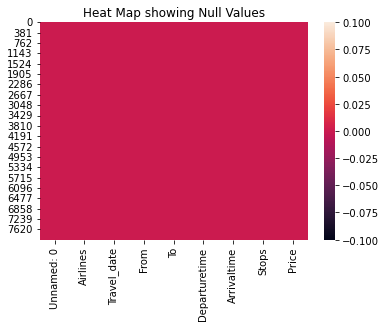

In [10]:
# lets visualize presence of null values or not using heatmap
sns.heatmap(df.isnull())
plt.title("Heat Map showing Null Values")
plt.show()

* Here we can see that there are no null values present in the dataset.

In [11]:
# lets check the datatype of each column present in the dataset
df.dtypes

Unnamed: 0        int64
Airlines         object
Travel_date      object
From             object
To               object
Departuretime    object
Arrivaltime      object
Stops            object
Price             int64
dtype: object

* Here we can see the first column Unnamed: 0 is having all the unique values, which we already observed.so, we will drop this column.

In [12]:
# lets drop the columns which are not required for working of this model
df.drop('Unnamed: 0', axis=1, inplace=True)

* Here we have successfully dropped the column which was not required for our model building.

In [13]:
# now lets check the value counts in all the columns of the dataset
for i in df.columns:
    print(df[i].value_counts())
    print('---------------------------------------------------')

IndiGo               2757
GoFirst              1942
Vistara              1039
AirIndia              991
AirAsia               701
SpiceJet              417
IndiGo,GoFirst         23
GoFirst,IndiGo         15
IndiGo,AirAsia         13
Vistara,GoFirst        11
AirAsia,GoFirst        10
AirAsia,IndiGo         10
Vistara,IndiGo          8
AirIndia,GoFirst        7
IndiGo,AirIndia         7
GoFirst,AirIndia        6
Vistara,AirIndia        4
SpiceJet,GoFirst        4
GoFirst,AirAsia         4
IndiGo,Vistara          3
SpiceJet,IndiGo         3
Vistara,AirAsia         3
AirAsia,SpiceJet        3
IndiGo,StarAir          2
SpiceJet,AirIndia       2
StarAir                 2
AirIndia,IndiGo         1
StarAir,IndiGo          1
SpiceJet,AirAsia        1
IndiGo,SpiceJet         1
GoFirst,Vistara         1
AirAsia,AirIndia        1
AirIndia,SpiceJet       1
AirIndia,AirAsia        1
Name: Airlines, dtype: int64
---------------------------------------------------
31/05/2022    1221
16/03/2022    11

* Here in Airlines columns we can see that IndiGo is having most no. of flights followed by GoFirst and Vistara
* In From and To column we can see that maximum number of flights are operating from NewDelhi followed by Mumbai and Bengaluru.
* In Stops Column we can observe that almost 40% of flights operate Nonstop followed by one stop and very few flights operate with more than one stop.

In [14]:
# lets group all Connecting Airlines columns to connecting flights
df["Airlines"].replace(("IndiGo,GoFirst","GoFirst,IndiGo","IndiGo,AirAsia","Vistara,GoFirst","AirAsia,GoFirst","AirAsia,IndiGo","Vistara,IndiGo","AirIndia,GoFirst","IndiGo,AirIndia","GoFirst,AirIndia","Vistara,AirIndia","SpiceJet,GoFirst","GoFirst,AirAsia","IndiGo,Vistara","SpiceJet,IndiGo","Vistara,AirAsia","AirAsia,SpiceJet","Indigo,StarAir","AirIndia,IndiGo","StarAir,IndiGo","SpiceJet,AirAsia","IndiGo,SpiceJet","GoFirst,Vistara","AirAsia,AirIndia","AirIndia,SpiceJet","AirIndia,AirAsia","IndiGo,StarAir","SpiceJet,AirIndia"),"Connecting Flights",inplace=True)

In [15]:
df.Airlines.unique()

array(['AirAsia', 'GoFirst', 'IndiGo', 'SpiceJet', 'AirIndia', 'Vistara',
       'Connecting Flights', 'StarAir'], dtype=object)

In [16]:
# lets group all 1stop flights to column 1stop
df['Stops'].replace(("1stopviaGoa","1stopviaMumbai","1stopviaNewDelhi","1stopviaHyderabad","1stopviaBengaluru","1stopviaGoa ","1stopviaChennai","1stopviaAhmedabad","1stopviaIndore","1stopviaJaipur","1stopviaPune","1stopviaNagpur","1stopviaLucknow","1stopviaChandigarh","1stopviaVadodara","1stopviaKochi","1stopviaKolkata","1stopviaCoimbatore","1stopviaMangalore","1stopviaRanchi","1stopviaBhopal","1stopviaVaranasi","1stopviaUdaipur","1stopviaJodhpur","1stopviaNasik","1stopviaAurangabad","1stopviaAmritsar","1stopviaMysore","1stopviaPatna","1stopviaJabalpur","1stopviaRajkot","1stopviaBagdogra","1stopviaSurat","1stopviaRaipur","1stopviaGuwahati","1stopviaHubli","1stopviaBelgaum","1stopviaDehradun","1stopviaBhubaneswar","1stopviaVisakhapatnam","1stopviaAllahabad","1stopviaJharsuguda"),'1Stop',inplace=True)

In [17]:
df['Stops'].replace(("2stopviaMumbai,NewDelhi","2stopviaNewDelhi,Mumbai","2stopviaAurangabad,NewDelhi","2stopviaHyderabad,Bengaluru","2stopviaHyderabad,Mysore","2stopviaBengaluru,NewDelhi","2stopviaMumbai,Indore","2stopviaMysore,Hyderabad","2stopviaMumbai,Aurangabad","2stopviaBengaluru,Hyderabad","2stopviaNewDelhi,Bengaluru","2stopviaIndore,Mumbai","2stopviaBhopal,NewDelhi","2stopviaHyderabad,Visakhapatnam","2stopviaMumbai,Bhopal","2stopviaIndore,NewDelhi","2stopviaAurangabad,Mumbai","2stopviaBhubaneswar,Kolkata","2stopviaRanchi,NewDelhi","2stopviaKolkata,Bhubaneswar","2stopviaHyderabad,Jaipur","2stopviaVisakhapatnam,Hyderabad","2stopviaBengaluru,Ranchi","2stopviaKochi,Mumbai","2stopviaHyderabad,Goa","2stopviaBengaluru,Mangalore","2stopviaBengaluru,Coimbatore","2stopviaNewDelhi,Indore","2stopviaGoa,Hyderabad","2stopviaNagpur,Pune","2stopviaKochi,Mysore","2stopviaGuwahati,Chennai","2stopviaNewDelhi,Hyderabad","2stopviaNewDelhi,Aurangabad","2stopviaNewDelhi,Goa","2stopviaPune,Hyderabad","2stopviaIndore,Hyderabad","2stopviaHyderabad,Cuddapah","2stopviaRanchi,Bengaluru","2stopviaLucknow,Pune","2stopviaMumbai,Ranchi","2stopviaKochi,Chennai","2stopviaUdaipur,NewDelhi","2stopviaMysore,Kochi","2stopviaPune,Nagpur","2stopviaNasik,Ahmedabad","2stopviaMumbai,Bengaluru"),"2Stops",inplace=True)

In [18]:
df['Stops'].replace(("3stopviaNewDelhi,Hyderabad,Mysore","3stopviaNewDelhi,Indore,Mumbai","3stopviaMysore,Hyderabad,NewDelhi","3stopviaNasik,Pune,Bhopal","3stopviaBhopal,NewDelhi,Hyderabad","3stopviaGuwahati,Imphal,Kolkata","3stopviaKolkata,Aizawl,Guwahati","3stopviaMumbai,Indore,NewDelhi","3stopviaNasik,Ahmedabad,Mumbai","3stopviaNewDelhi,Ahmedabad,Nasik","3stopviaBhopal,NewDelhi,Mumbai"),"3Stops",inplace=True)

In [19]:
df['Stops'].replace(("4stopviaNasik,Pune,Bhopal,NewDelhi"),"4Stops",inplace=True)

In [20]:
df.Stops.unique()

array(['1Stop', 'Nonstop', '3Stops', '2Stops', '4Stops'], dtype=object)

In [21]:
# Now lets check the presence of unique values present in each column
df.nunique()

Airlines            8
Travel_date         7
From                6
To                  6
Departuretime     268
Arrivaltime       272
Stops               5
Price            1966
dtype: int64

* Here we can see the unique values present in each column of the dataset

In [22]:
#Lets check null values in Dataset
print("Empty cells in Dataset is ",df.isna().values.any())
print("\nColumnwise Empty cell\n")
print(df.isna().sum())

Empty cells in Dataset is  False

Columnwise Empty cell

Airlines         0
Travel_date      0
From             0
To               0
Departuretime    0
Arrivaltime      0
Stops            0
Price            0
dtype: int64


# Feature Extraction:

In [23]:
# lets change datatype of column Travel_date from object to datetime
df['Travel_date']=pd.to_datetime(df['Travel_date'])

In [24]:
# now lets separate date month and year to simplify data for analysis
df['Date']=pd.to_datetime(df.Travel_date,format='%d%m%y').dt.day
df['Month']=pd.to_datetime(df.Travel_date,format='%d%m%y').dt.month
df['Year']=pd.to_datetime(df.Travel_date,format='%d%m%y').dt.year

In [25]:
# now lets drop the column Travel_date to avoid duplication in dataset
df.drop(['Travel_date'],axis=1, inplace=True)

In [26]:
# now once again lets check the first 5 rows of dataset after splitting the Travel_date column
df.head()

,Airlines,From,To,Departuretime,Arrivaltime,Stops,Price,Date,Month,Year
0,AirAsia,NewDelhi,Mumbai,08:20,14:10,1Stop,5953,3,1,2022
1,AirAsia,NewDelhi,Mumbai,08:20,14:10,1Stop,5953,3,1,2022
2,AirAsia,NewDelhi,Mumbai,20:00,02:25,1Stop,5953,3,1,2022
3,AirAsia,NewDelhi,Mumbai,12:20,02:25,1Stop,5953,3,1,2022
4,AirAsia,NewDelhi,Mumbai,20:45,07:15,1Stop,5953,3,1,2022


* Here we can see that we have successfully separated the Travel_date column and after separating we have deleted Travel_date column to avoid any duplication in the dateset.

In [27]:
# now lets again check the unique values present in all the columns
df.nunique()

Airlines            8
From                6
To                  6
Departuretime     268
Arrivaltime       272
Stops               5
Price            1966
Date                5
Month               4
Year                1
dtype: int64

* Here we can see that in column year there is only one unique value as we have scrapped data for 3 months from march to may in year 2022 only. so, we can delete year column as it wont help our model in predicition.

In [28]:
df.drop(['Year'],axis=1,inplace=True)

In [29]:
# lets convert the datatype of Departuretime and Arrivaltime for object dtype to datetime dtype
df["Departuretime"]=pd.to_datetime(df["Departuretime"])
df["Arrivaltime"]=pd.to_datetime(df["Arrivaltime"])

In [30]:
# lets seperate hour and minutes from Departuretime
df["Departhour"]=pd.to_datetime(df['Departuretime']).dt.hour
df["DepartMin"]=pd.to_datetime(df["Departuretime"]).dt.minute

In [31]:
df=df.drop(['Departuretime'],axis=1)

In [32]:
# separting hour and minutes from Arrivaltime
df["Arrhour"]=pd.to_datetime(df["Arrivaltime"]).dt.hour
df["Arrmin"]=pd.to_datetime(df["Arrivaltime"]).dt.hour

In [33]:
# lets drop Arrivaltime for any duplication
df=df.drop(["Arrivaltime"],axis=1)

In [34]:
# lets again check the datatypes of all the columns after feature engineering
df.dtypes

Airlines      object
From          object
To            object
Stops         object
Price          int64
Date           int64
Month          int64
Departhour     int64
DepartMin      int64
Arrhour        int64
Arrmin         int64
dtype: object

In [35]:
# lets check the bottom five columns
df.tail()

,Airlines,From,To,Stops,Price,Date,Month,Departhour,DepartMin,Arrhour,Arrmin
7990,IndiGo,Ahmedabad,Goa,1Stop,6003,31,5,8,50,18,18
7991,GoFirst,Ahmedabad,Goa,1Stop,7290,31,5,9,10,16,16
7992,Vistara,Ahmedabad,Goa,1Stop,7313,31,5,8,25,13,13
7993,GoFirst,Ahmedabad,Goa,1Stop,7493,31,5,22,20,13,13
7994,GoFirst,Ahmedabad,Goa,1Stop,8441,31,5,9,30,23,23


In [36]:
# lets check the statistical description of the dataset to know more about the dataset
df.describe(include='all')

,Airlines,From,To,Stops,Price,Date,Month,Departhour,DepartMin,Arrhour,Arrmin
count,7995,7995,7995,7995,7995.000000,7995.000000,7995.000000,7995.000000,7995.000000,7995.000000,7995.000000
unique,8,6,6,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,IndiGo,NewDelhi,NewDelhi,1Stop,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,2757,1959,1851,4374,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,5173.836273,20.162101,3.573609,13.133333,27.264540,13.265666,13.265666
std,NaN,NaN,NaN,NaN,3438.543722,10.010714,1.303151,6.296345,17.798442,7.101834,7.101834
min,NaN,NaN,NaN,NaN,620.000000,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,NaN,NaN,NaN,3627.000000,15.000000,3.000000,8.000000,10.000000,8.000000,8.000000
50%,NaN,NaN,NaN,NaN,4565.000000,16.000000,4.000000,14.000000,30.000000,14.000000,14.000000
75%,NaN,NaN,NaN,NaN,5878.500000,31.000000,5.000000,19.000000,45.000000,20.000000,20.000000


* Here in the dataset we can see that outliers are present in only Price column but since Price is our Target Column we are not going to do anything with it, in other columns outliers are not present
* Same stands for Skewness we can see high skewness in our target column, skewness is also present in date and month column and DepartMin.

# Visualization:

# Univariate Analysis:

In [37]:
# lets split the columns from datatype object and integer
categorical=[]
integer=[]
for i in df.columns:
    if df[i].dtypes=='object':
        categorical.append(i)
    else:
        integer.append(i)
print(categorical)
print("--------------------------------------------")
print(integer)

['Airlines', 'From', 'To', 'Stops']
--------------------------------------------
['Price', 'Date', 'Month', 'Departhour', 'DepartMin', 'Arrhour', 'Arrmin']


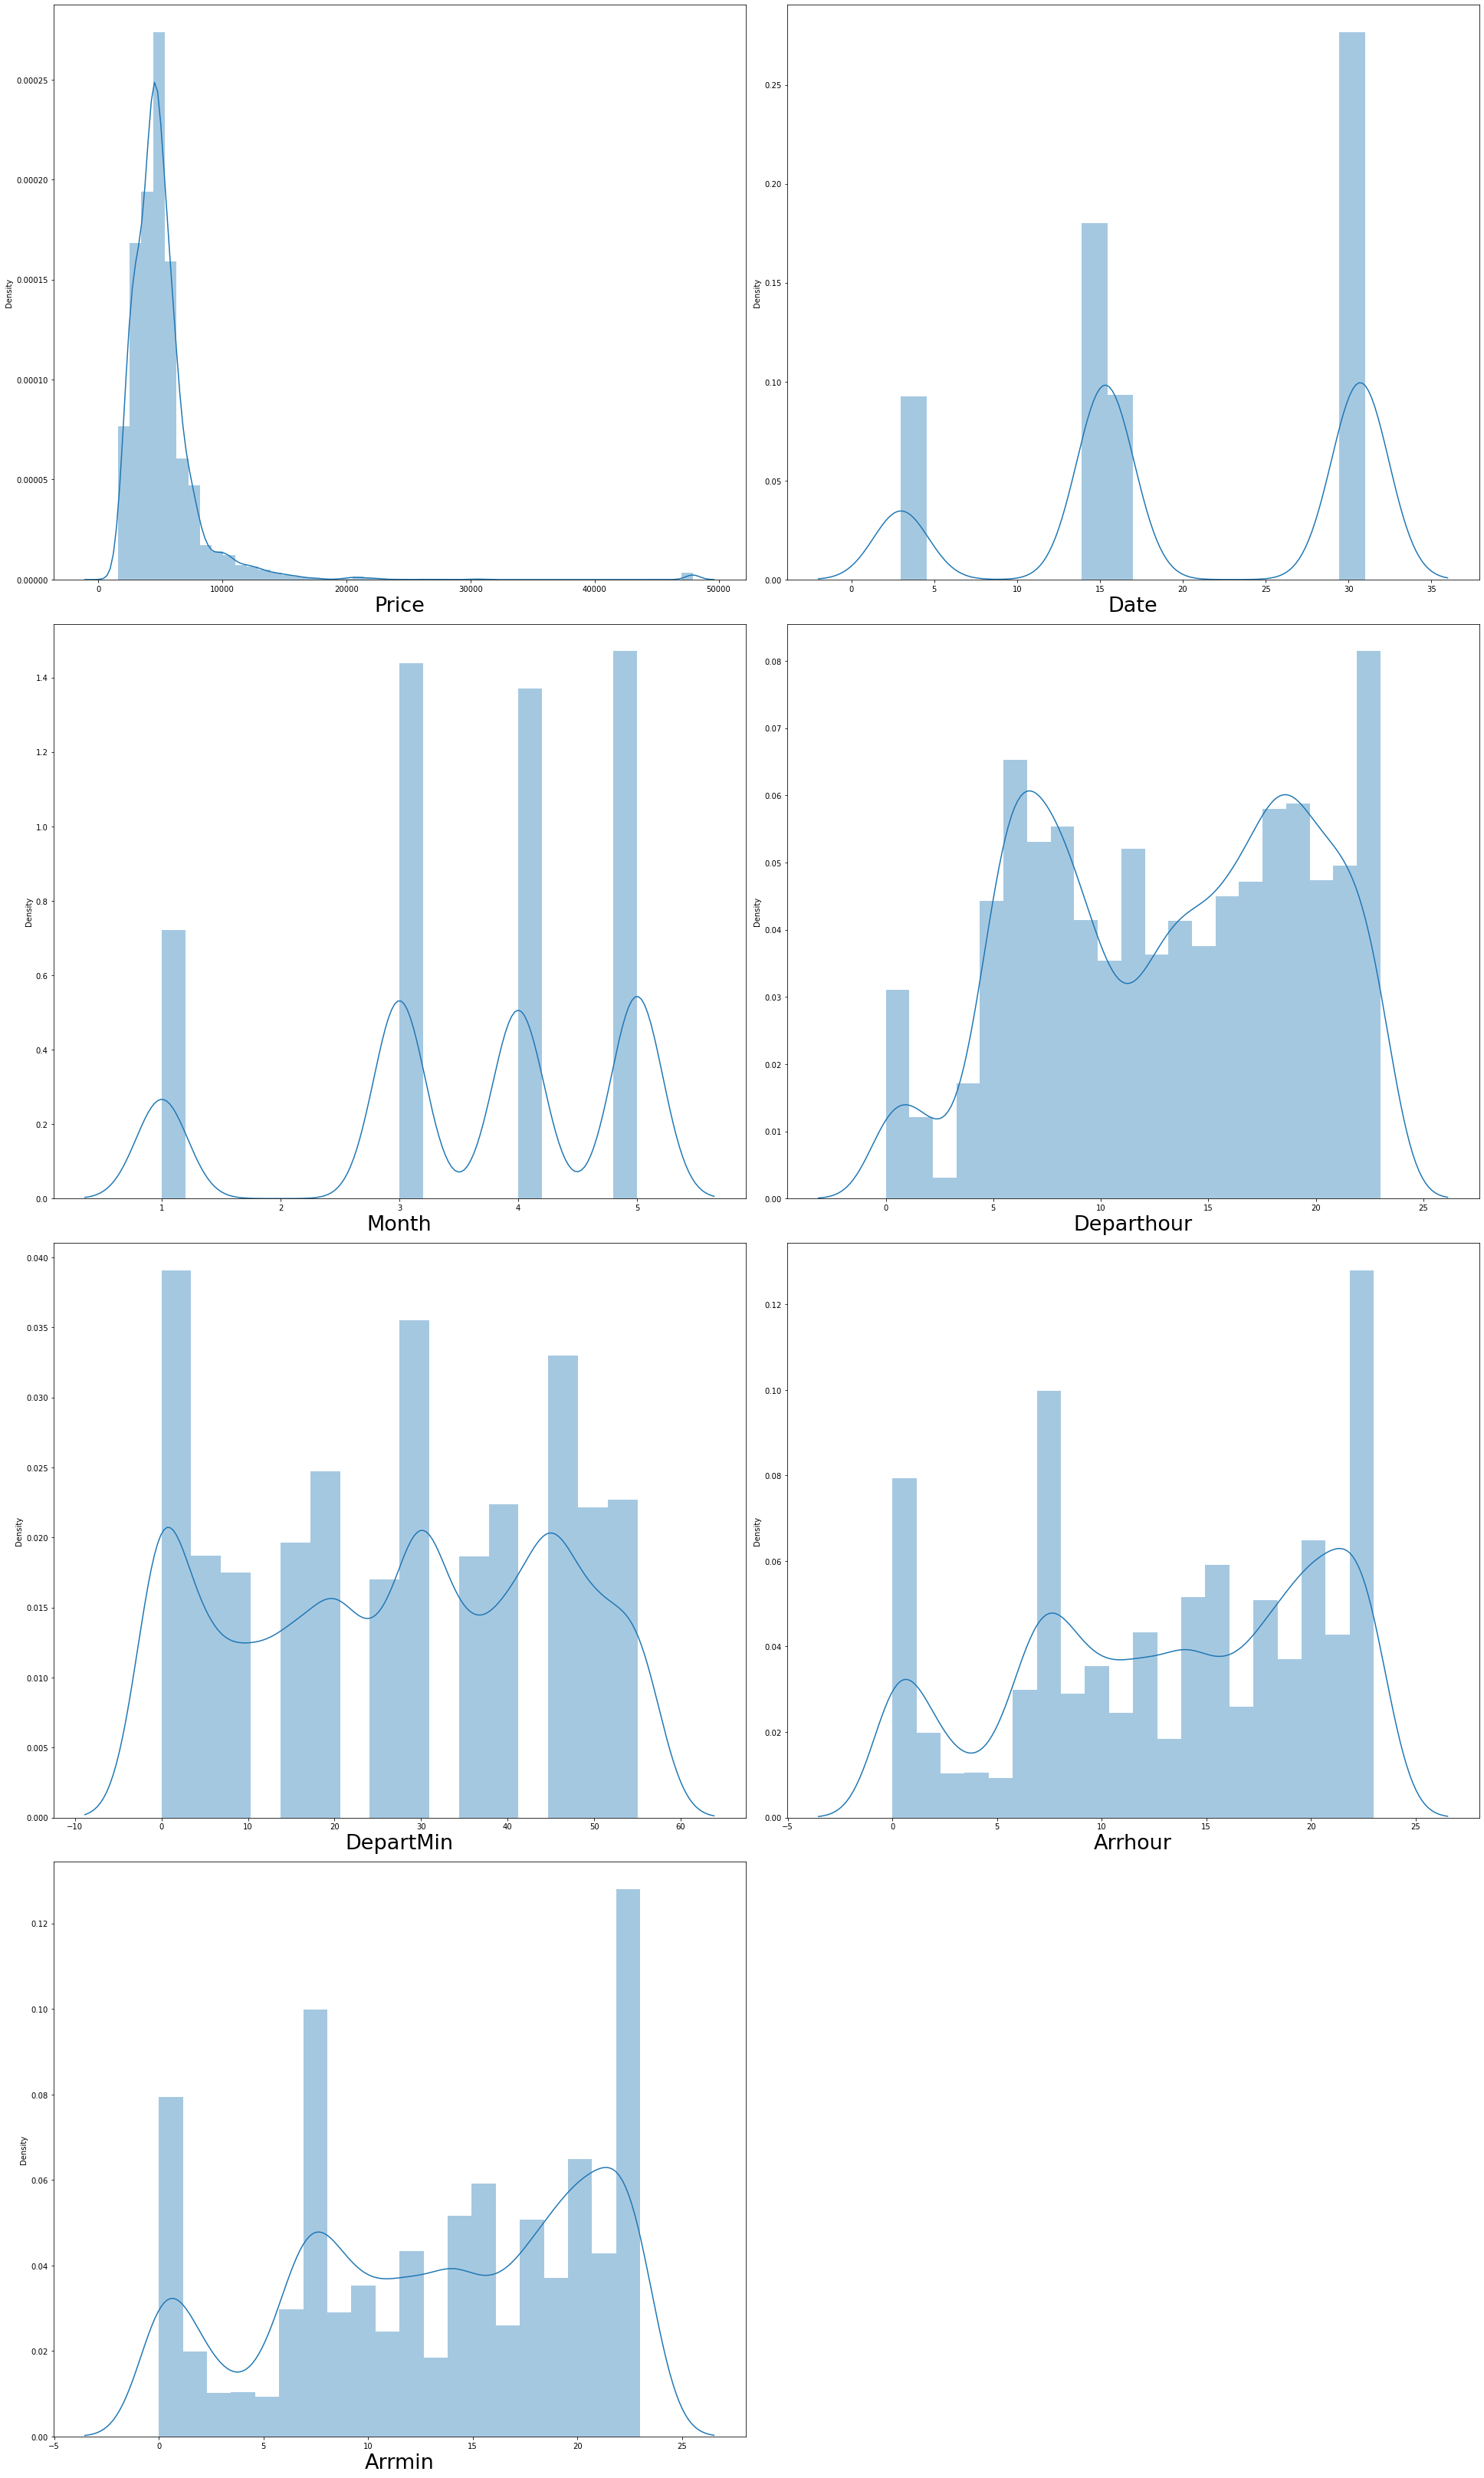

In [38]:
# lets visualize all numerical columns using distribution plots
plt.figure(figsize=(27,45))
no=1
for i in df[integer]:
    if no <=7:
        ax=plt.subplot(4,2,no)
        sns.distplot(df[i])
        plt.xlabel(i,fontsize=27)
    no+=1
plt.tight_layout()

* Here we can see as predicted there is high skewness present in our target column Price.
* In column Month and Date some amount of skewness is present. 

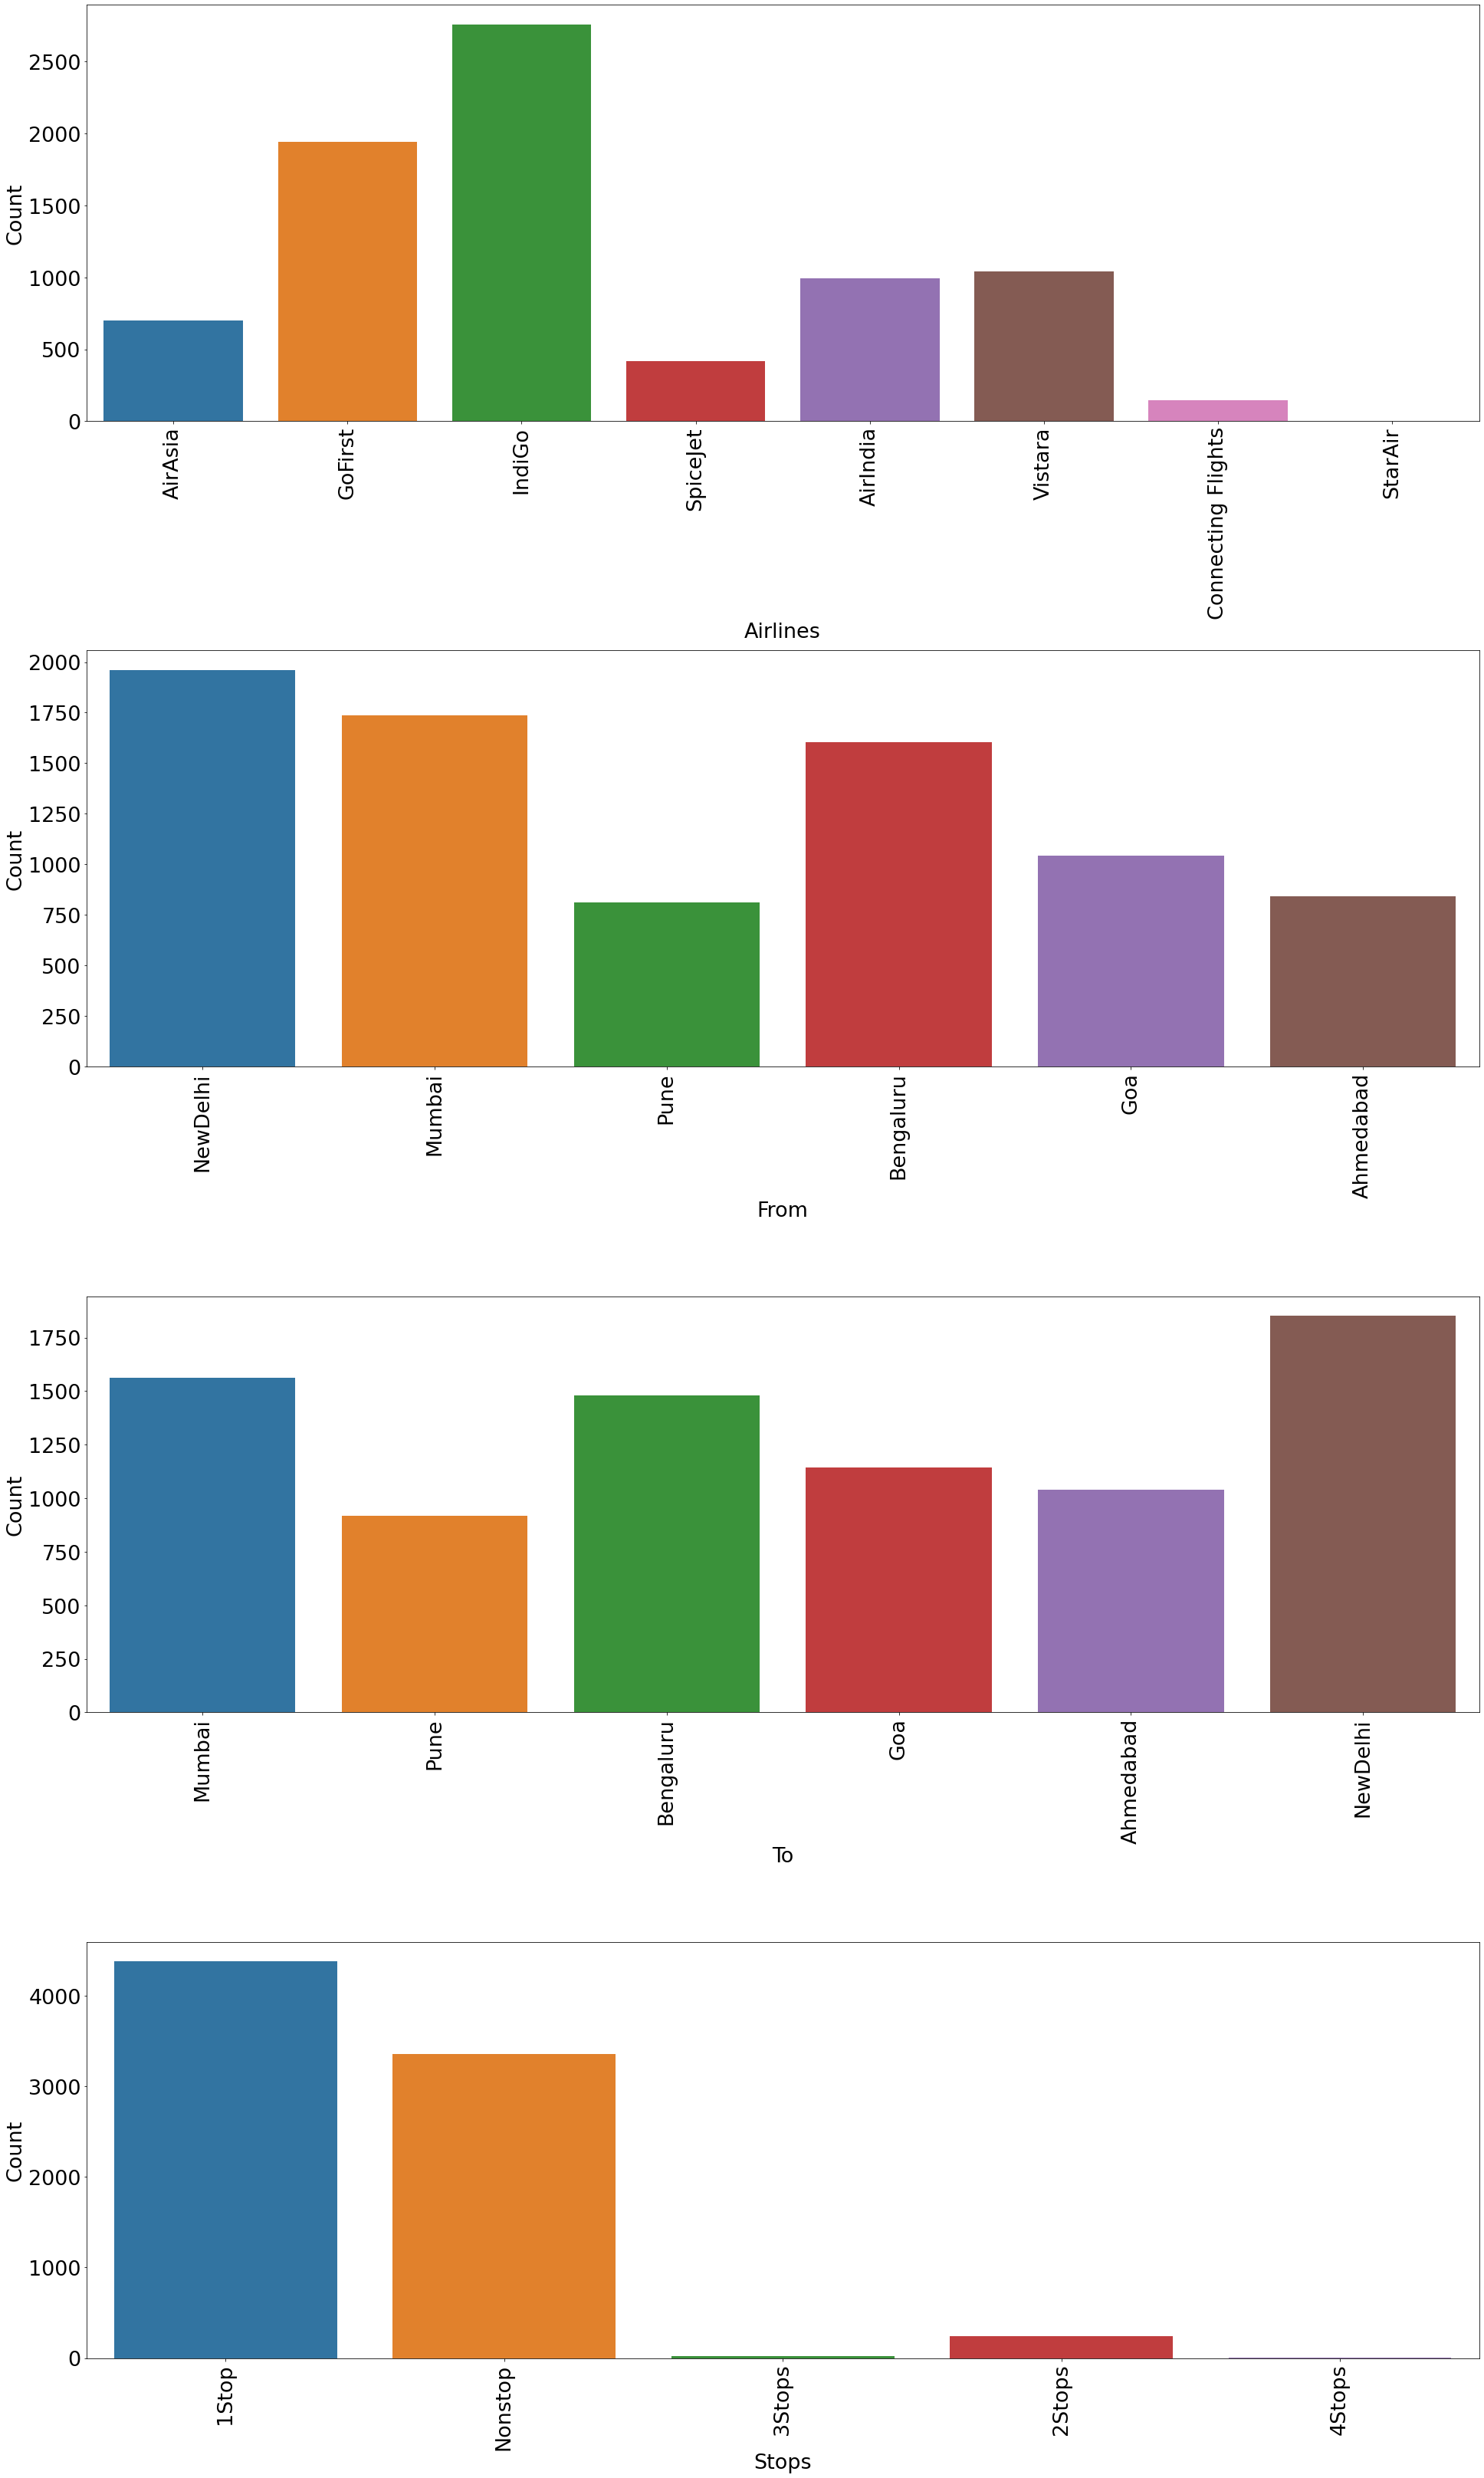

In [39]:
# lets Visualize all categorical columns using count plot
plt.figure(figsize=(27,45))
no=1
for i in df[categorical]:
    if no<=4:
        ax=plt.subplot(4,1,no)
        sns.countplot(df[i])
        plt.xticks(rotation=90, fontsize=27)
        plt.yticks(fontsize=27)
        plt.xlabel(i,fontsize=27)
        plt.ylabel("Count",fontsize=27)
    no+=1
plt.tight_layout()

* Here in first count plot we can clearly see that leading Airlines are Indigo which has maximum flights, followed by GoFirst, then Vistara and AirIndia, then all other airlines, so, we can say that Indigo is market leader with maximum fleets.
* Here in second plot we can clearly see that Delhi is Top source with maximum no. of flight departure in INDIA, followed by Mumbai and Bengaluru, then other cities.
* Here in Third plot we can clearly see that Delhi is also the top destination for maximum no. of flight arrival in INDIA, again followed by Mumbai and Bengaluru.
* Here in fourth plot we can see that most flight are connecting flights with 1 hault, then NonStop Flights and then more stops.

# Bivariate Analysis:

In [40]:
# lets make list of integer column without our target column
intcol=['Date', 'Month', 'Departhour', 'DepartMin', 'Arrhour', 'Arrmin']

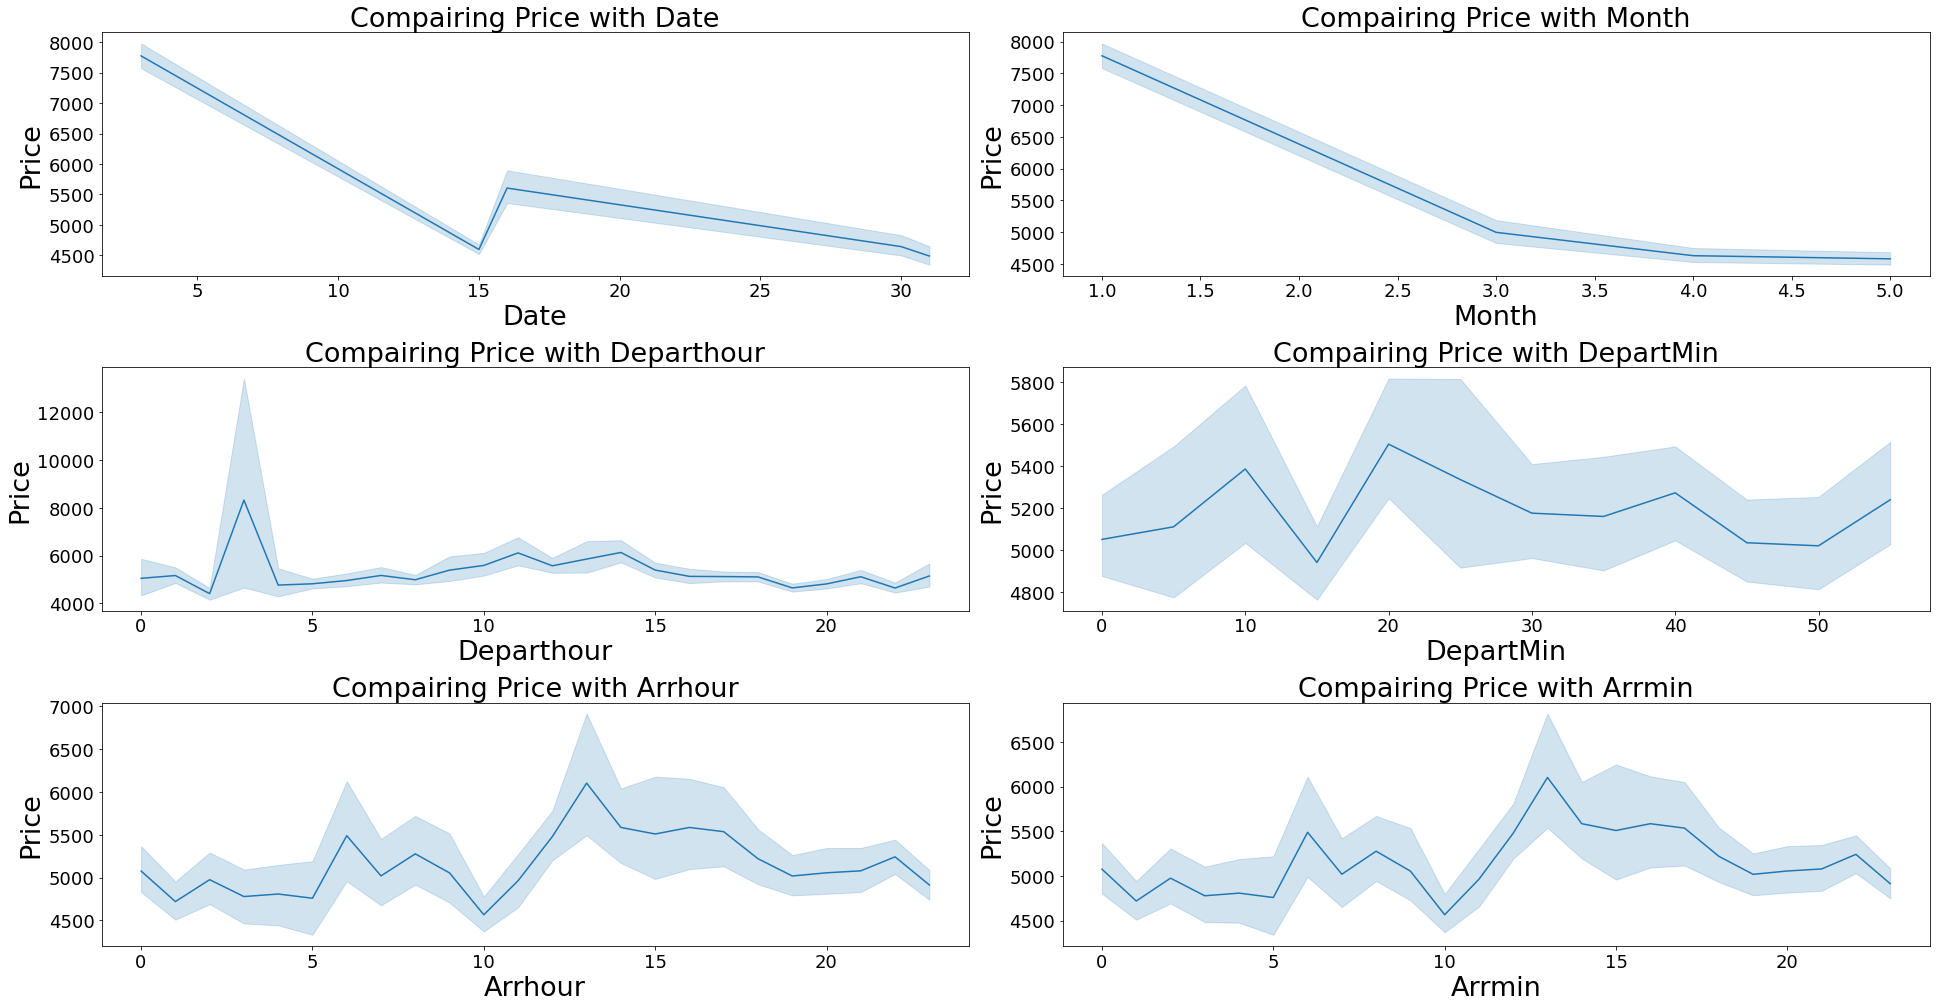

In [41]:
# Now lets compare Date with our target column Price
plt.figure(figsize=(27,18))
for i in range(len(intcol)):
    plt.subplot(4,2,i+1)
    sns.lineplot(x=df[intcol[i]], y=df['Price'])
    plt.title(f"Compairing Price with {intcol[i]}", fontsize=27)
    plt.xticks(fontsize=18)
    plt.yticks(fontsize=18)
    plt.xlabel(intcol[i],fontsize=27)
    plt.ylabel('Price', fontsize=27)
    plt.tight_layout()

* Here we can observe that closer the travel date for travelling, higher are the price and if we book in advance after preplanning, we can get much cheaper price for same destination.

* Here we can see that there are chances of getting cheaper ticket for same destination if we plan well in advance. Closer the date of travelling comes, Higher the prices we have to pay for travelling.

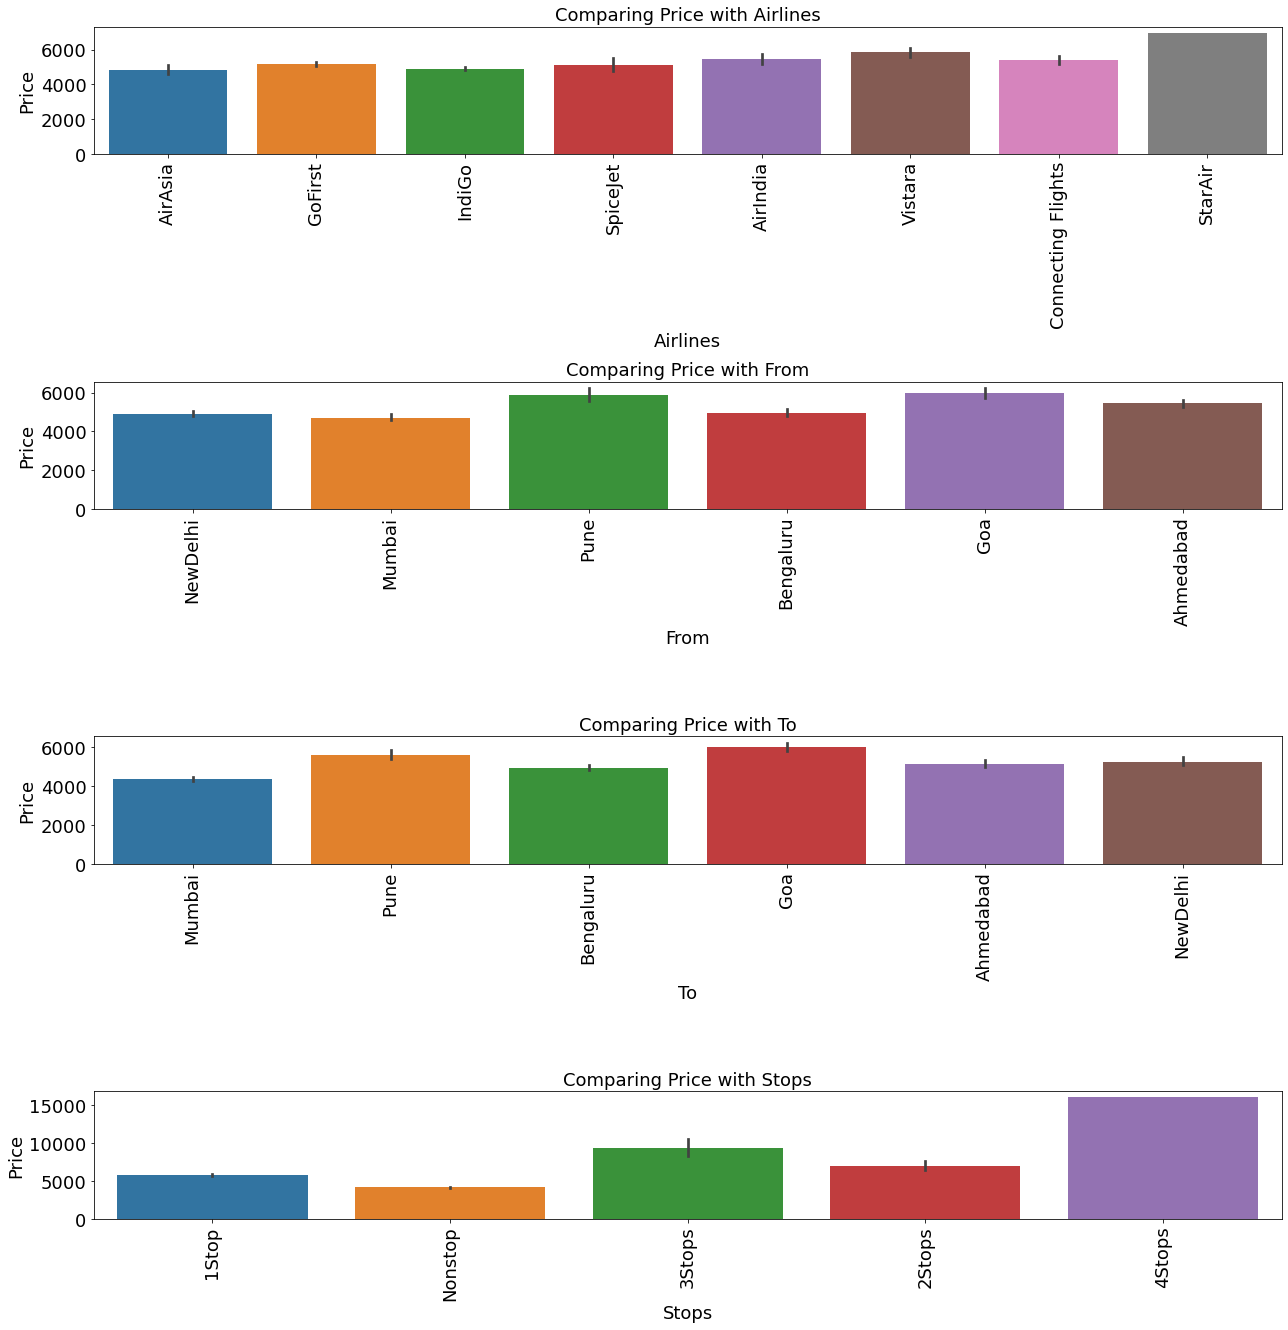

In [42]:
# now lets compare all categorical columns with our target column
plt.figure(figsize=(18,27))
for i in range(len(categorical)):
    plt.subplot(6,1,i+1)
    sns.barplot(x=df[categorical[i]],y=df['Price'])
    plt.title(f"Comparing Price with {categorical[i]}",fontsize=18)
    plt.xticks(rotation=90,fontsize=18)
    plt.yticks(fontsize=18)
    plt.xlabel(categorical[i],fontsize=18)
    plt.ylabel('Price',fontsize=18)
    plt.tight_layout()

* Here in first Bar plot we can clearly see that price of tickets for direct non stop flights is cheaper as compared to one stop or more.
* In second Bar plot we can clearly see that price of tickets for flights starting from Mumbai is cheaper compared to other cities, followed by Delhi, and Bengaluru.
* In third barplot we can clearly see that price of tickets where destination is Mumbai, is cheaper as compared to other cities, followed by Delhi and Bengaluru.
* In fourth barplot we can observe that if we travel during 2nd half of day, means Afternoon and Evening we will have to bear high prices, however, tickets for morning and latenight departure is comparitively cheaper.
* Same in fifth barplot, if arrival time is in the late evening than chances are we might have to pay higher prices.
* In sixth barplot, we can observe that Non-stop flights are comparitively cheaper than one stop flights, and far cheaper than 2 stop flights.

# Multivariate Analysis:

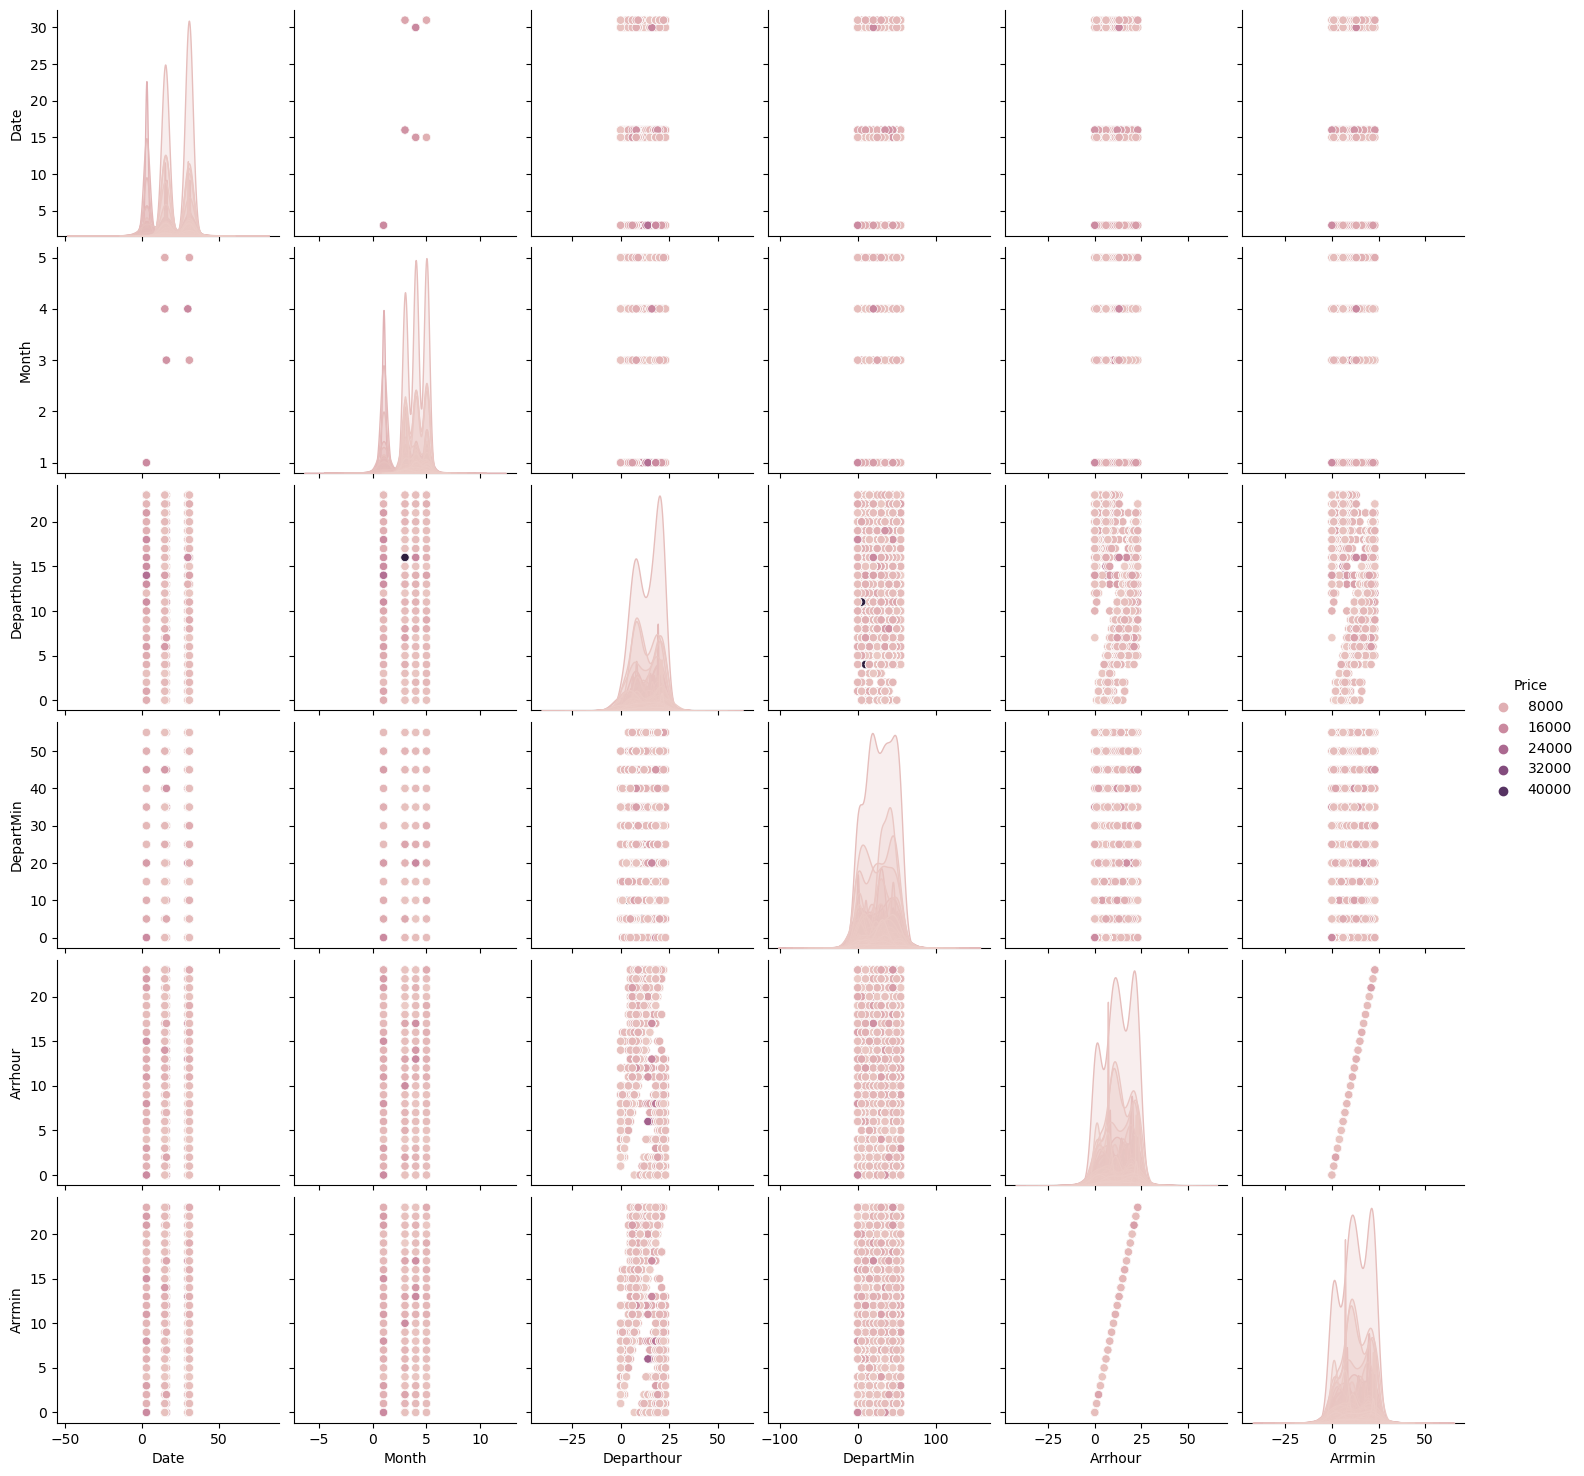

In [43]:
# lets visualize relationship among all the columns in the dataset
plt.style.use('default')
a=sns.pairplot(df,hue='Price',diag_kind='kde')
for ac in a.axes.flat:
    ax.tick_params('x',labelrotation=90)
plt.show()

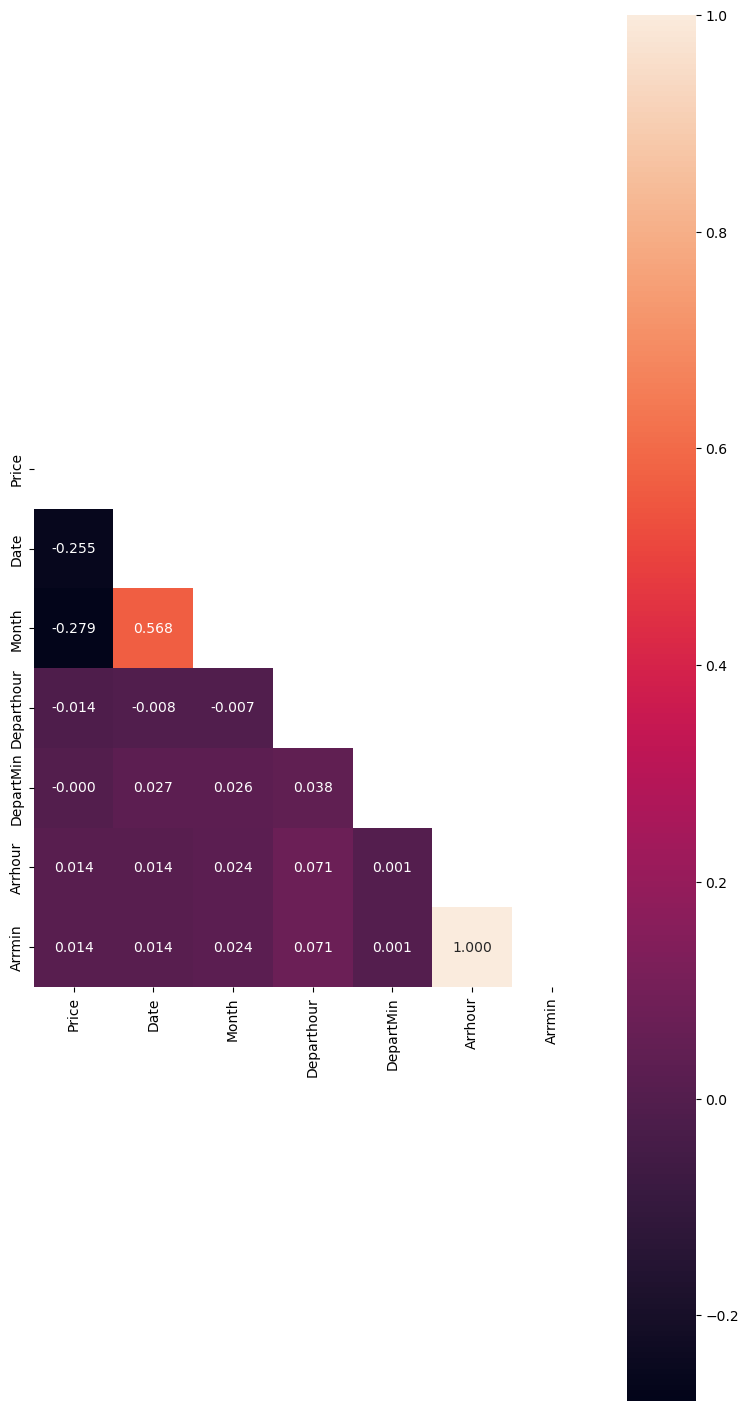

In [44]:
# lets see correlation of all the columns using the heatmap
tri=np.triu(df.corr())
plt.figure(figsize=(9,18))
sns.heatmap(df.corr(),annot=True, square=True, fmt='0.3f',mask=tri)
plt.xticks(rotation=90)
plt.show()

* Here we can see that date and month column are negatively correlated to our target column.

# Outliers :

<AxesSubplot:>

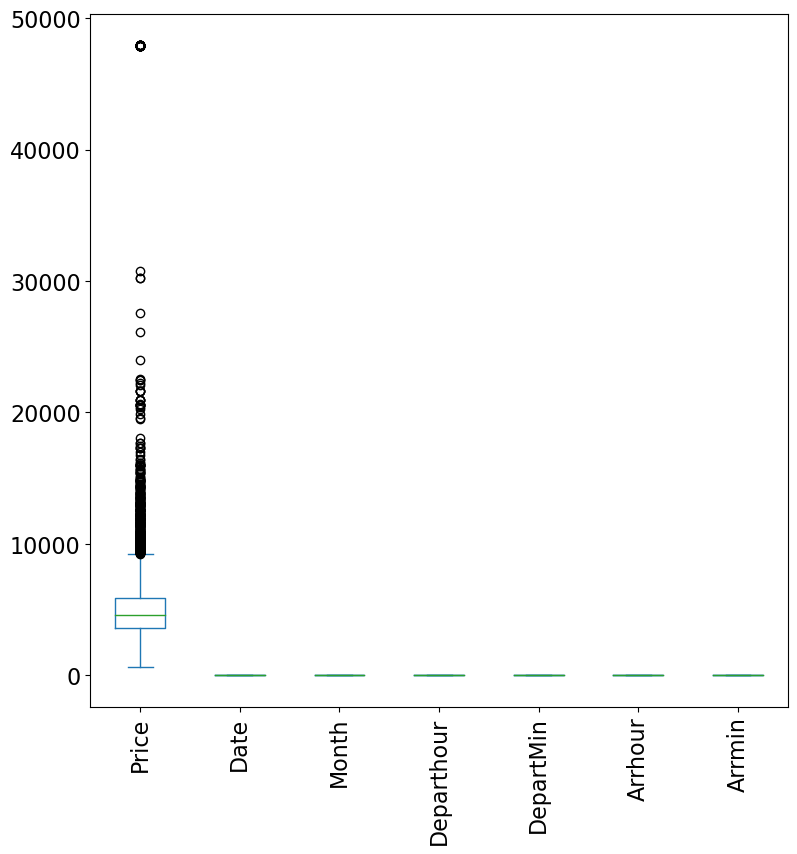

In [45]:
# lets check and visualize presence of outliers using boxplot
df.plot(rot=90,kind='box',fontsize=16,figsize=(9,9))

* As predicted outliers are present only in our target column Price, and since Price is our target column we are not going to remove outliers as it can hit performance of our model.

# Skewness :

In [46]:
# lets check the skewness in the dataset
df.skew()

Price         7.162827
Date         -0.272942
Month        -0.740448
Departhour   -0.172743
DepartMin    -0.092191
Arrhour      -0.334043
Arrmin       -0.334043
dtype: float64

* Skewness is present in our Target column Price but we will not remove outliers from Price column as it can hit our models performance. lets not remove skewness from column month as well as it has data for only 3 months, we can say it is like a categorical column with numeric values.

In [47]:
# Lets remove skewness using yeo-johnson method:
featur=["Month"]

In [48]:
# lets impliment yeo-johnson method
from sklearn.preprocessing import PowerTransformer
test_scaler=PowerTransformer(method='yeo-johnson')
'''
parameters:
method='box_cox' or 'yeo-johnson'
'''

"\nparameters:\nmethod='box_cox' or 'yeo-johnson'\n"

In [49]:
df[featur]=test_scaler.fit_transform(df[featur].values)

In [50]:
# lets check the skewness once again
df.skew()

Price         7.162827
Date         -0.272942
Month        -0.272213
Departhour   -0.172743
DepartMin    -0.092191
Arrhour      -0.334043
Arrmin       -0.334043
dtype: float64

# Encoding :

In [51]:
# lets convert dtype using labelEncoder
# importing library for label encoder
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df[categorical]=df[categorical].apply(le.fit_transform)
df[categorical].head()

,Airlines,From,To,Stops
0,0,4,3,0
1,0,4,3,0
2,0,4,3,0
3,0,4,3,0
4,0,4,3,0


* Here we can see that we have successfully encoded all the categorical columns

In [52]:
# Now lets check the correlation among all the columns
df.corr()

,Airlines,From,To,Stops,Price,Date,Month,Departhour,DepartMin,Arrhour,Arrmin
Airlines,1.000000,0.004713,0.023558,0.114146,0.039505,0.003268,0.004368,-0.027830,0.156211,0.077675,0.077675
From,0.004713,1.000000,-0.190897,0.061059,-0.003700,0.006427,0.008386,-0.015682,-0.017940,0.072528,0.072528
To,0.023558,-0.190897,1.000000,0.085072,0.016196,-0.004993,-0.003898,-0.000944,-0.009975,-0.080563,-0.080563
Stops,0.114146,0.061059,0.085072,1.000000,-0.236443,-0.017131,-0.018487,0.050184,-0.026453,-0.008357,-0.008357
Price,0.039505,-0.003700,0.016196,-0.236443,1.000000,-0.254872,-0.253504,-0.014346,-0.000409,0.014264,0.014264
Date,0.003268,0.006427,-0.004993,-0.017131,-0.254872,1.000000,0.501190,-0.008190,0.026602,0.013613,0.013613
Month,0.004368,0.008386,-0.003898,-0.018487,-0.253504,0.501190,1.000000,-0.006900,0.025491,0.023846,0.023846
Departhour,-0.027830,-0.015682,-0.000944,0.050184,-0.014346,-0.008190,-0.006900,1.000000,0.037625,0.071158,0.071158
DepartMin,0.156211,-0.017940,-0.009975,-0.026453,-0.000409,0.026602,0.025491,0.037625,1.000000,0.001410,0.001410
Arrhour,0.077675,0.072528,-0.080563,-0.008357,0.014264,0.013613,0.023846,0.071158,0.001410,1.000000,1.000000


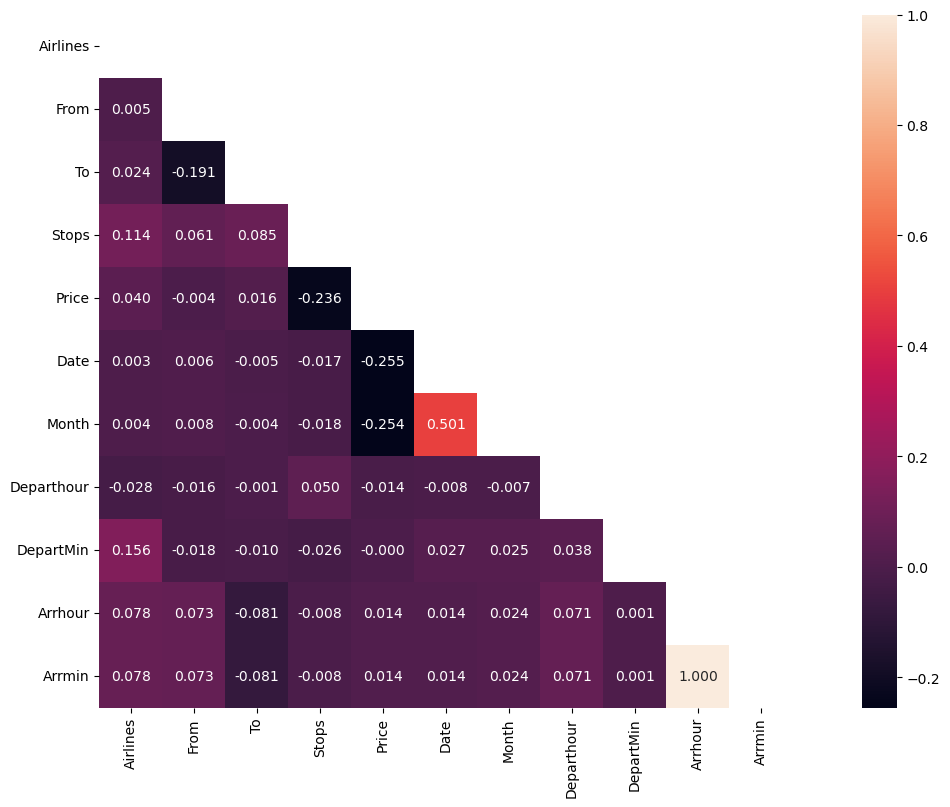

In [53]:
# lets visualize the correlation by plotting heatmap
tri=np.triu(df.corr())
plt.figure(figsize=(18,9))
sns.heatmap(df.corr(),annot=True, square=True, fmt='0.3f', mask=tri)
plt.xticks(rotation=90)
plt.show()

* Here we can see that there is no multicolinearity issue present in the dataset.
* there is good positive corelation between columns Month and Date.
* Stops, Date and Month columns are Negatively Correlated to our target column Price.

# Model Building :

In [54]:
# lets assign values to x and y for training and testing our dataset
x=df.drop('Price',axis=1)
y=df['Price']

* Here we have successfully separated the features and target columns

# Scaling:

In [55]:
# importing all required libraries
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x1=pd.DataFrame(scaler.fit_transform(x),columns=x.columns)
x1.head()

,Airlines,From,To,Stops,Date,Month,Departhour,DepartMin,Arrhour,Arrmin
0,-1.778067,0.908435,0.277387,-0.877772,-1.714481,-1.739882,-0.815339,-0.408182,0.103407,0.103407
1,-1.778067,0.908435,0.277387,-0.877772,-1.714481,-1.739882,-0.815339,-0.408182,0.103407,0.103407
2,-1.778067,0.908435,0.277387,-0.877772,-1.714481,-1.739882,1.090648,-1.531946,-1.586403,-1.586403
3,-1.778067,0.908435,0.277387,-0.877772,-1.714481,-1.739882,-0.180010,-0.408182,-1.586403,-1.586403
4,-1.778067,0.908435,0.277387,-0.877772,-1.714481,-1.739882,1.090648,0.996524,-0.882315,-0.882315


* We have successfully scaled the dataset.

# Best Random State:

In [56]:
# lets find best random state and Accuracy:
# importing all required libraries for model selection
from sklearn.metrics import accuracy_score, r2_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [59]:
max_acc=0
max_rs=0
for i in range(0,200):
    x_train,x_test,y_train,y_test=train_test_split(x1,y,test_size=.30,random_state=i)
    m=RandomForestRegressor()
    m.fit(x_train,y_train)
    pred=m.predict(x_test)
    acc=r2_score(y_test,pred)
    if acc>max_acc:
        max_acc=acc
        max_rs=i
print("Best Accuracy: ",max_acc, "On Random_state: ",max_rs)

Best Accuracy:  0.6259605409270027 On Random_state:  111


* Here we are getting score of 62.60% on random state 111

In [60]:
x_train,x_test,y_train,y_test=train_test_split(x1,y,test_size=.30,random_state=111 )

# Regression Problem

In [61]:
# creating an Algorithm to predict scores of multiple models
# lets import all required libraries for model selection
from sklearn.neighbors import KNeighborsRegressor as KNN
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.ensemble import ExtraTreesRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.linear_model import Lasso,Ridge,ElasticNet, LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

model=[LinearRegression(),KNN(),XGBRegressor(),SVR(),RandomForestRegressor(),ExtraTreesRegressor(),AdaBoostRegressor(),GradientBoostingRegressor(),Lasso(),Ridge(),ElasticNet()]
for i in model:
    i.fit(x_train,y_train)
    pred=i.predict(x_test)
    print("Accuracy Score :",i,"is", i.score(x_train,y_train))
    print("\nError")
    print("Mean Absolute Error: ", mean_absolute_error(y_test,pred))
    print("Root mean Squared Error: ", (mean_squared_error(y_test,pred))**0.5)
    print("r2 Score: ",r2_score(y_test,pred))
    
    print("--------------------------------------------------------------")
    print("\n\n")

Accuracy Score : LinearRegression() is 0.13852657750513475

Error
Mean Absolute Error:  1503.233348262822
Root mean Squared Error:  3167.130838394
r2 Score:  0.17842573311455123
--------------------------------------------------------------



Accuracy Score : KNeighborsRegressor() is 0.5133072151553435

Error
Mean Absolute Error:  1250.6111713213838
Root mean Squared Error:  2981.5090407795356
r2 Score:  0.27190662550270017
--------------------------------------------------------------



Accuracy Score : XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_a

# Cross Validation of all models:

In [62]:
# lets import libraries for cross validation
from sklearn.model_selection import cross_val_score
for j in model:
    cvs=cross_val_score(j,x_train,y_train,cv=15).mean()
    print("Score of ",j, "is", cvs)

Score of  LinearRegression() is 0.14378017898522177
Score of  KNeighborsRegressor() is 0.22217444692734217
Score of  XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None) is 0.23218478707913326
Score of  SVR() is -0.003498742880440638
Score of  RandomForestRegressor() is 0.3636041435120269
Score of  ExtraTreesRegressor() is 0.4488355195248082
Score of  AdaBoostRegressor() is -0.06899711323220105
Score of  GradientBoosting

* Based on r2score and cross validation score, ExtraTreesRegressor is having least difference, so, we will take ExtraTreesRegressor as our best model and will hypertune it for best performance.

# Hyper Parameter Tuning:

In [63]:
# lets import all required library
from sklearn.model_selection import GridSearchCV

In [66]:
ETR=ExtraTreesRegressor()
parameter={'n_estimators':[10,50,100],'max_depth':[2,8,16],'criterion':['mse','mae'],'max_features':['auto','sqrt'],'random_state':[223]}
search=GridSearchCV(ETR,parameter)
search.fit(x_train,y_train)                                                          

GridSearchCV(estimator=ExtraTreesRegressor(),
             param_grid={'criterion': ['mse', 'mae'], 'max_depth': [2, 8, 16],
                         'max_features': ['auto', 'sqrt'],
                         'n_estimators': [10, 50, 100], 'random_state': [223]})

In [67]:
print(search.best_params_)

{'criterion': 'mae', 'max_depth': 16, 'max_features': 'auto', 'n_estimators': 100, 'random_state': 223}


In [69]:
ETR=ExtraTreesRegressor(n_estimators=100, max_depth=16, criterion='mae',max_features='auto',random_state=223)
ETR.fit(x_train,y_train)
ETR.score(x_train,y_train)
pred=ETR.predict(x_test)
print("Accuracy Score: ",r2_score(y_test,pred))
print("Mean Absolute Error: ",mean_absolute_error(y_test,pred))
print("Root Mean Squared Error: ",(mean_squared_error(y_test,pred)**0.5))

Accuracy Score:  0.6407400713351263
Mean Absolute Error:  752.7838015839934
Root Mean Squared Error:  2094.3390030861665


* Here after hyper parametertuning we got score of 64%.

# Saving the Model:

In [70]:
# saving the model
# importing library to save model
import pickle
Name="Flight_Price_Prediction.pkl"
pickle.dump(ETR,open(Name,'wb'))

# Loading Model:

In [71]:
model=pickle.load(open(Name,'rb'))

In [72]:
prediction=model.predict(x_test)
prediction

array([7091.51, 4671.77, 4002.49, ..., 2512.81, 2029.65, 3024.42])

In [73]:
pd.DataFrame([model.predict(x_test)[:],y_test[:]],index=["Predicted","Actual"])

,0,1,2,3,4,5,6,7,8,9,...,2389,2390,2391,2392,2393,2394,2395,2396,2397,2398
Predicted,7091.51,4671.77,4002.49,5949.31,6924.795,3448.44,8611.19,3885.355,4704.16,3343.1,...,3055.08,4505.16,5729.315,5646.52,3363.36,5109.795,4977.085,2512.81,2029.65,3024.42
Actual,5953.00,4266.00,3861.00,5966.00,4413.000,3441.00,11721.00,3228.000,4052.00,3000.0,...,3001.00,4500.00,6894.000,7081.00,3540.00,5060.000,5576.000,2791.00,2000.00,3002.00


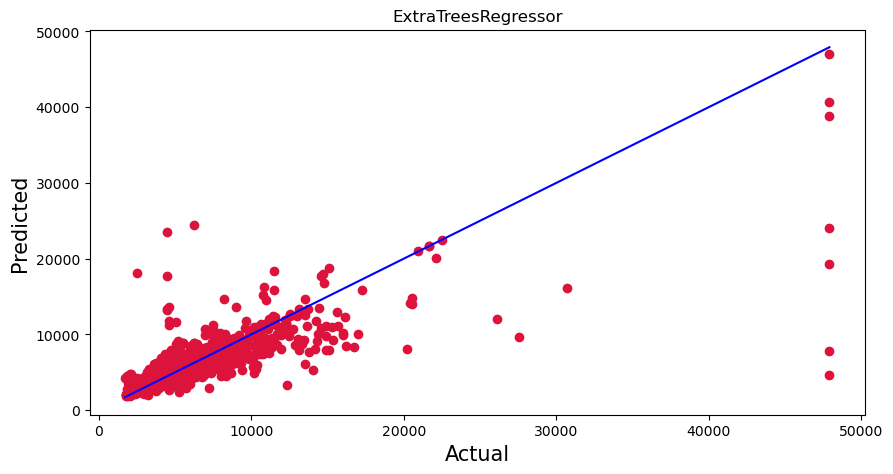

In [74]:
plt.figure(figsize=(10,5))
plt.scatter(y_test, prediction, c='crimson')
p1 = max(max(prediction), max(y_test))
p2 = min(min(prediction), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('Actual', fontsize=15)
plt.ylabel('Predicted', fontsize=15)
plt.title("ExtraTreesRegressor")
plt.show()

* Here in the picture we can see Actual vs Predicted. Blue line refers to Actual values and red dots are predicted values.

Conclusion:
* In this project report, we used Machine learning algorithms to predict the Flights price.                                  
* We used proper procedure to analyze the dataset and finding the correlation between the features.                                     
* Here we selected the Features which are correlated to each other and are independent in nature.                                
* Visualization helped us in understanding the data by graphical representation to make things easy for us to understand what data is trying to say.                                                       
* As Data cleaning is one of the most important step to remove unrequired data which was not required for our model building and prediction.                                                     
* Then we removed skewness from the dataset to prepare our model for training and testing purpose.               
* After prepairing our model we separated feature and target columns for training and testing purposes.                        
* We deployed multiple models to find the best model.          
* We got ExtraTreesRegressor as our best model based on r2_score and cross vaildation score.                               
* Then we did hyper parameter tuning of our best model for best possible results.                                                  
* Finally we saved the final model and predicted the label.       
* To, conclude, The FLIGHT PRICE PREDICTION PROJECT, We hope this study will move a small step ahead in providing some methodological contribution.                                                        
* Finally Thank You very much for giving me oppurtunity to scrap data first, then saving it in csv format and importing it to jupyter notebook and applying machine learning algorithms to pick the best model.

# Project Complete:
Thank you so much for Your precious Time.